<a href="https://www.kaggle.com/code/natalyyakobov/binary-classification-94-acc-alzheimers?scriptVersionId=185726403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="https://octodex.github.com/images/labtocat.png" width=200 height=100 />

## Doctor, Is he sick? does he have Alzheimer's disease? 😯🩺 <br>
Let's see.. <br> 
well, this algorithm can detect if the patient is sick with 94% accuracy <br>
# To sum up
In this project I explored the 🧠 Alzheimers disease dataset downloaded from Kaggle.com <br>
The most **relevant features** for this **xgboost** model are as follows:
1. **Functional Assessment** (ranging from 0 to 10. Lower scores indicate greater impairment.)
2. **ADL (Activities of Daily Living** score, ranging from 0 to 10. Lower scores indicate greater impairment.)
3. **MMSE (Mini-Mental State Examination** score, ranging from 0 to 30. Lower scores indicate cognitive impairment.)
4. **Memory Complaints**
5. **Behavioral Problems**

And there are some more (not so much contributing) features:  

6. Cholesterol HDL
7. Diet Quality
8. Sleep Quality
9. Alcohol Consumption
10. Cholesterol Triglycerides


# Binary Classification- workflow
Main steps:
- Exploratory Data Analysis (EDA): Visualize features' relationships and distributions.
- Data Preprocessing: Scale the cumulative features.
- Model Training: Train some models on the preprocessed data. (Models: SVM, Log. Regression, Rand. Forest, GBoost, Naive Bayes, XGBoost with Rand. searchCV, Neural Networks)
- Model Evaluation: Evaluate the models' performances.

<br>
The model was fit to patients who had normal levels of cholesterol and blood pressure, in the ages of 60-90 years old.

when symptoms appear after the age of 60 it implies that we are talking about late-onset Alzheimer's disease(AD). 
I expect family history to positively correlate with AD positives:

> Family history of dementia (FH) is a recognized risk factor for developing late-onset Alzheimer's disease [(pubmed article)](https://pubmed.ncbi.nlm.nih.gov/26531229/).

I'm gonna illustrate that later on by plotting the FamilyHistoryAlzheimers feature for AD positives.

<br>
Plus, I'd like to see how higher education relates to AD positives. I'm gonna use the EducationLevel feature for that.

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
   for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv


**Read .csv as a dataframe**

In [2]:
data=pd.read_csv('/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv')

**Check the DataFrame**

In [3]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
data.drop(["PatientID",'DoctorInCharge'],axis=1,inplace=True)

In [6]:
np.transpose(data.describe())

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


In [7]:
data['bins'] = pd.cut(data['Age'],bins=[60,69,79,90], labels=["60-69","70-79","80-90"])

/tmp/ipykernel_18/3011079821.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(data.groupby('bins').size(),labels=data.groupby('bins').size().index,colors = colors, autopct='%.0f%%')
/tmp/ipykernel_18/3011079821.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(data.groupby('bins').size(),labels=data.groupby('bins').size().index,colors = colors, autopct='%.0f%%')


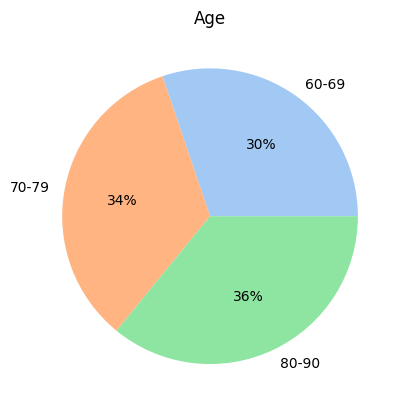

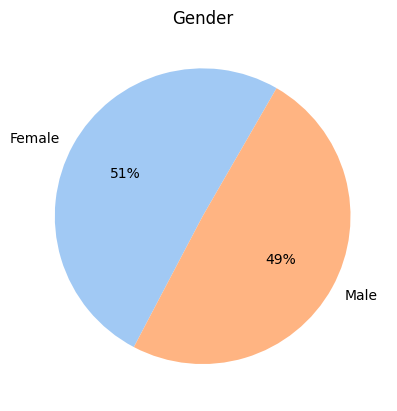

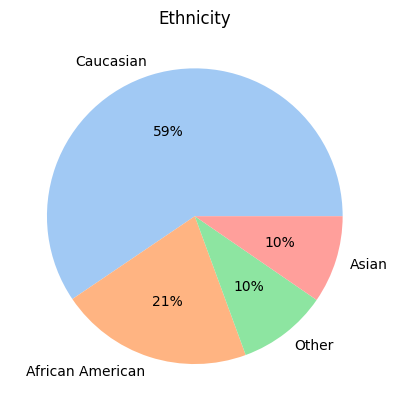

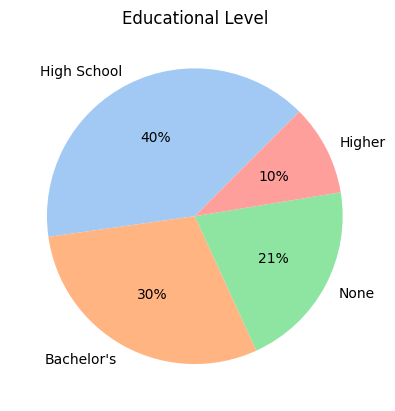

In [8]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(data.groupby('bins').size(),labels=data.groupby('bins').size().index,colors = colors, autopct='%.0f%%')
plt.title("Age")
plt.show()
plt.pie(data['Gender'].value_counts(),startangle=60,labels=['Female','Male'], colors = colors, autopct='%.0f%%')
plt.title("Gender")
plt.show()
plt.pie(data['Ethnicity'].value_counts(), labels=['Caucasian','African American','Other','Asian'], colors = colors, autopct='%.0f%%')
plt.title("Ethnicity")
plt.show()
plt.pie(data['EducationLevel'].value_counts(),startangle=45, labels=['High School',"Bachelor's",'None','Higher'], colors = colors, autopct='%.0f%%')
plt.title("Educational Level")
plt.show()
data.drop(['bins'],axis=1,inplace=True)

Checking the Diagnosis distribution of EducationLevel, Ethnicity and FamilyHistoryAlzheimers:

In [9]:
total=data['EducationLevel'].value_counts().sort_index()
diagnosis=data.groupby('EducationLevel')['Diagnosis'].sum()
percentage= diagnosis/ total * 100
percentage.name='Diagnosis, %'
y=pd.Series([100]*4)
df_educ=pd.concat([total,diagnosis,percentage,y],axis=1)
df_educ.index=['None','Highschool',"Bachelor's",'Higher']
df_educ.rename(columns={'count':'Total',0:'Total, %'},inplace=True)
print(df_educ)
total=data['Ethnicity'].value_counts().sort_index()
diagnosis=data.groupby('Ethnicity')['Diagnosis'].sum()
percentage= diagnosis/ total * 100
percentage.name='Diagnosis, %'
df_ethn=pd.concat([total,diagnosis,percentage,y],axis=1)
df_ethn.rename(columns={'count':'Total',0:'Total, %'},inplace=True)
df_ethn.index=['Caucasian','African American','Asian','Other']
print(df_ethn)
total=data['FamilyHistoryAlzheimers'].value_counts().sort_index()
diagnosis=data.groupby('FamilyHistoryAlzheimers')['Diagnosis'].sum()
percentage= diagnosis/ total * 100
percentage.name='Diagnosis, %'
df_famh=pd.concat([total,diagnosis,percentage,y[:2]],axis=1)
df_famh.rename(columns={'count':'Total',0:'Total, %'},inplace=True)
print(df_famh)


            Total  Diagnosis  Diagnosis, %  Total, %
None          446        174     39.013453       100
Highschool    854        302     35.362998       100
Bachelor's    636        217     34.119497       100
Higher        213         67     31.455399       100
                  Total  Diagnosis  Diagnosis, %  Total, %
Caucasian          1278        463     36.228482       100
African American    454        146     32.158590       100
Asian               206         84     40.776699       100
Other               211         67     31.753555       100
   Total  Diagnosis  Diagnosis, %  Total, %
0   1607        583     36.278780       100
1    542        177     32.656827       100


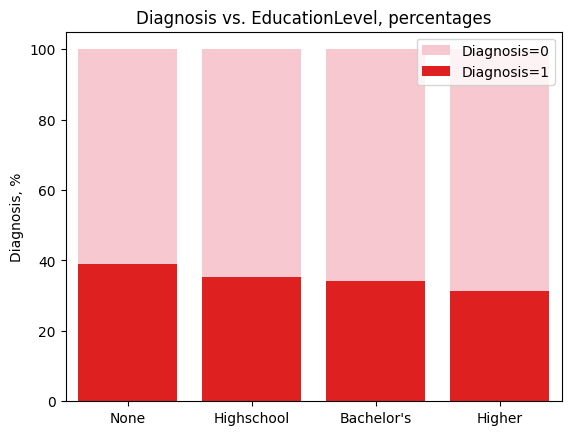

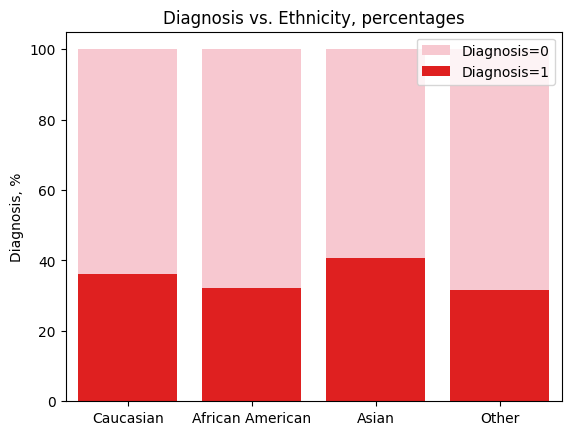

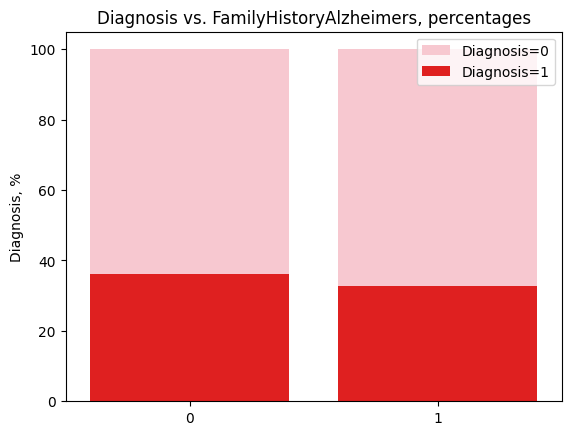

In [10]:
sns.barplot(df_educ,x=df_educ.index,y='Total, %',color='pink',label='Diagnosis=0')
sns.barplot(df_educ,x=df_educ.index,y='Diagnosis, %',color='red',label='Diagnosis=1')
plt.title("Diagnosis vs. EducationLevel, percentages")
plt.legend()
plt.show()
sns.barplot(df_ethn,x=df_ethn.index,y='Total, %',color='pink',label='Diagnosis=0')
sns.barplot(df_ethn,x=df_ethn.index,y='Diagnosis, %',color='red',label='Diagnosis=1')
plt.title("Diagnosis vs. Ethnicity, percentages")
plt.legend()
plt.show()
sns.barplot(df_famh,x=df_famh.index,y='Total, %',color='pink',label='Diagnosis=0')
sns.barplot(df_famh,x=df_famh.index,y='Diagnosis, %',color='red',label='Diagnosis=1')
plt.title("Diagnosis vs. FamilyHistoryAlzheimers, percentages")
plt.legend()
plt.show()

Diagnosis vs. EducationLevel: There is a minor decrease along the x axis, suggeting that high education decreases chances of developing AD. 
<br>


Diagnosis vs. Ethnicity: Asians have a little higher chances of developing AD. 
<br>

Diagnosis vs. FamilyHistoryAlzheimers: no effect! family history doesn't matter here.
<br>


 I'm gonna check that out statistically with some chi-square tests:

In [11]:
import scipy.stats as stats

df_educ['Not']=df_educ['Total']-df_educ['Diagnosis']
observed=np.array(df_educ[['Diagnosis','Not']].values) 
chi2, p, dof, expected = stats.chi2_contingency(observed)
print(f"EducationLevel p-value: {p}")

df_ethn['Not']=df_ethn['Total']-df_ethn['Diagnosis']
observed=np.array(df_ethn[['Diagnosis','Not']].values) 
chi2, p, dof, expected = stats.chi2_contingency(observed)
print(f"Ethnicity p-value: {p}")

df_famh['Not']=df_famh['Total']-df_famh['Diagnosis']
observed=np.array(df_famh[['Diagnosis','Not']].values) 
chi2, p, dof, expected = stats.chi2_contingency(observed)
print(f"FamilyHistoryAlzheimers p-value: {p}")


EducationLevel p-value: 0.21650771973324673
Ethnicity p-value: 0.09780307184026778
FamilyHistoryAlzheimers p-value: 0.14069795394928386


The p-value is 0.217, which is greater than alpha level of 0.05. This means that there is no statistically significant difference among the different **Education Levels**.

🔥The p-value is 0.098🔥, which is greater than alpha level of 0.05 but less than 0.10. This suggests that there is a weak evidence against the null hypothesis, implying that there may be some differences among the different **Ethnic groups**. 

The p-value is 0.141, which is greater than alpha level of 0.05. This means that there is no statistically significant difference between the two groups of **family history**.
<br>



**Select cumulative columns To scale**

In [12]:
cols2scale=(data.columns[data.dtypes=='float64']).tolist()+['Age','SystolicBP','DiastolicBP']
data[cols2scale]

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Age,SystolicBP,DiastolicBP
0,22.927749,13.297218,6.327112,1.347214,9.025679,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883,73,142,72
1,26.827681,4.542524,7.619885,0.518767,7.151293,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424,89,115,64
2,17.795882,19.555085,7.844988,1.826335,9.673574,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548,73,99,116
3,33.800817,12.209266,8.428001,7.435604,8.392554,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226,74,118,115
4,20.716974,18.454356,6.310461,0.795498,5.597238,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691,89,94,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,39.121757,1.561126,4.049964,6.555306,7.535540,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,4.492838,61,122,101
2145,17.857903,18.767261,1.360667,2.904662,8.555256,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,9.204952,75,152,106
2146,15.476479,4.594670,9.886002,8.120025,5.769464,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,5.036334,77,115,118
2147,15.299911,8.674505,6.354282,1.263427,8.322874,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,3.785399,78,103,96


The following histograms show that the data is not biased, the distributions are within norma

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


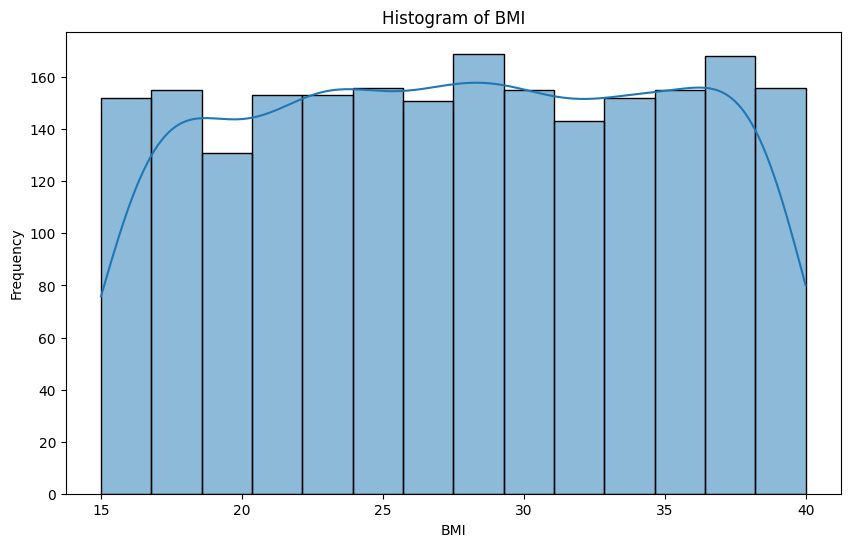

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


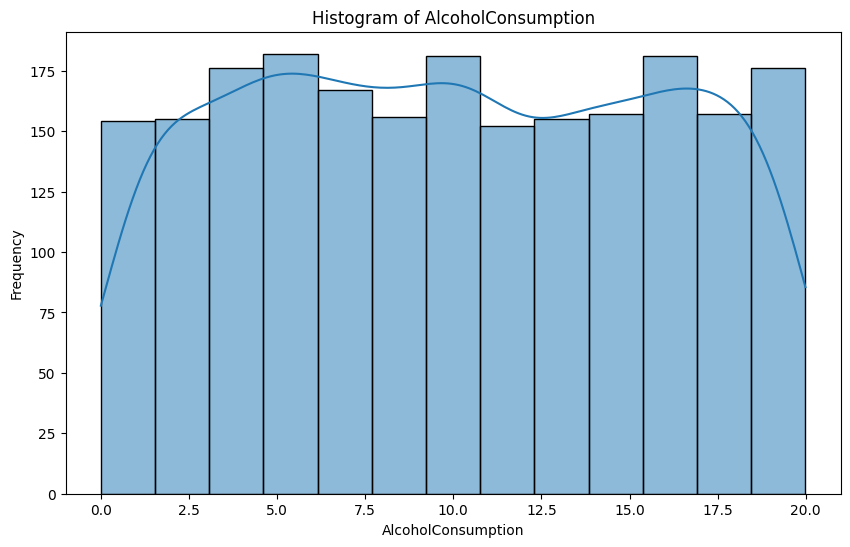

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


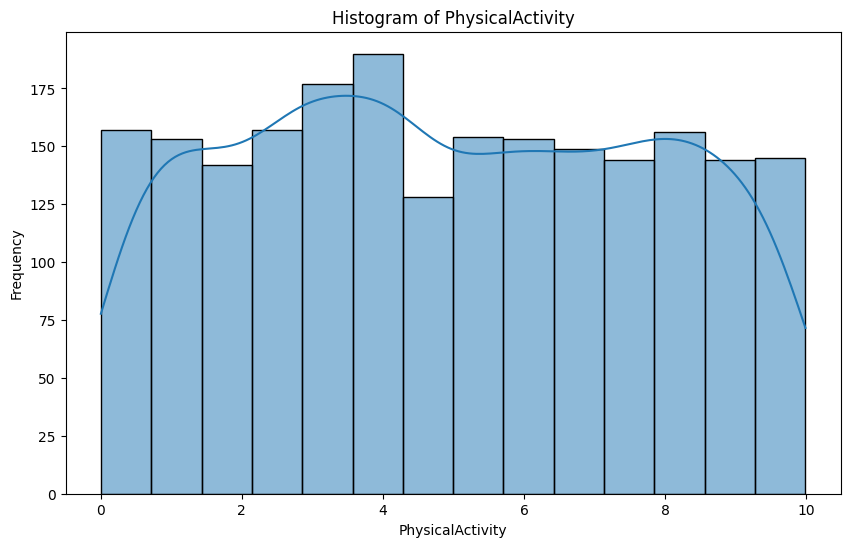

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


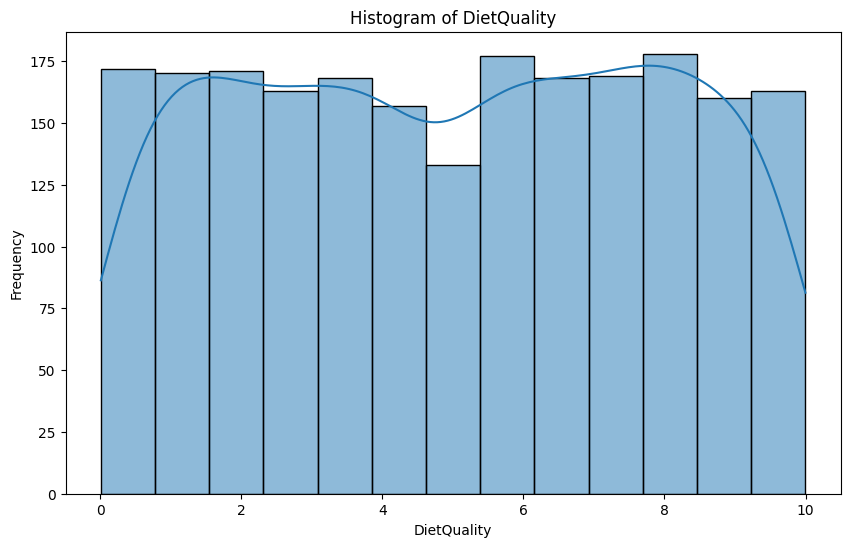

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


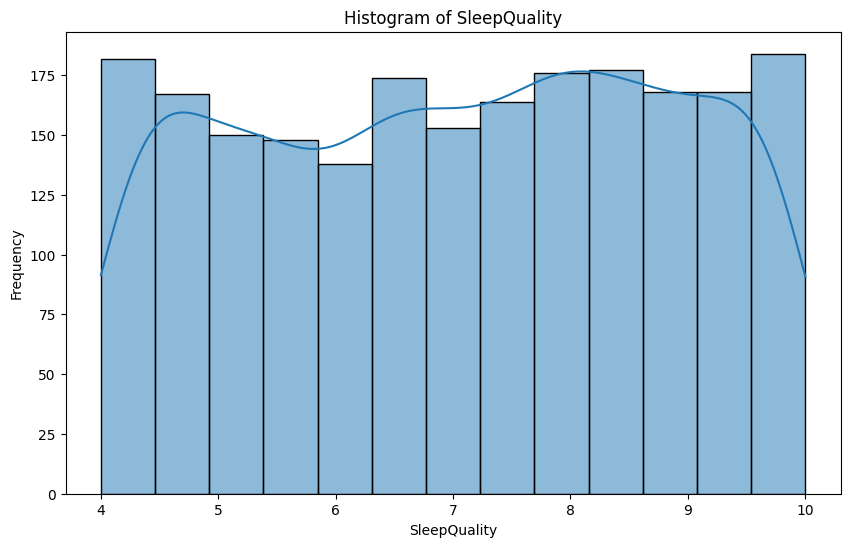

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


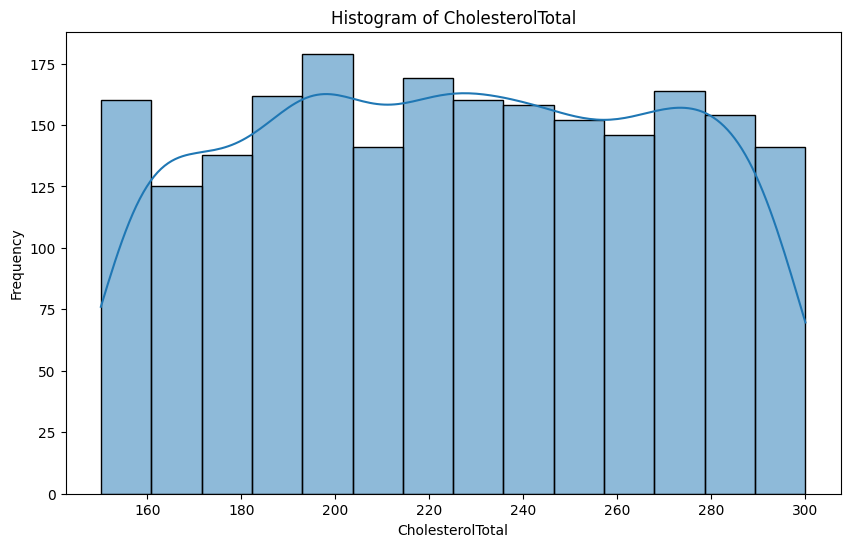

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


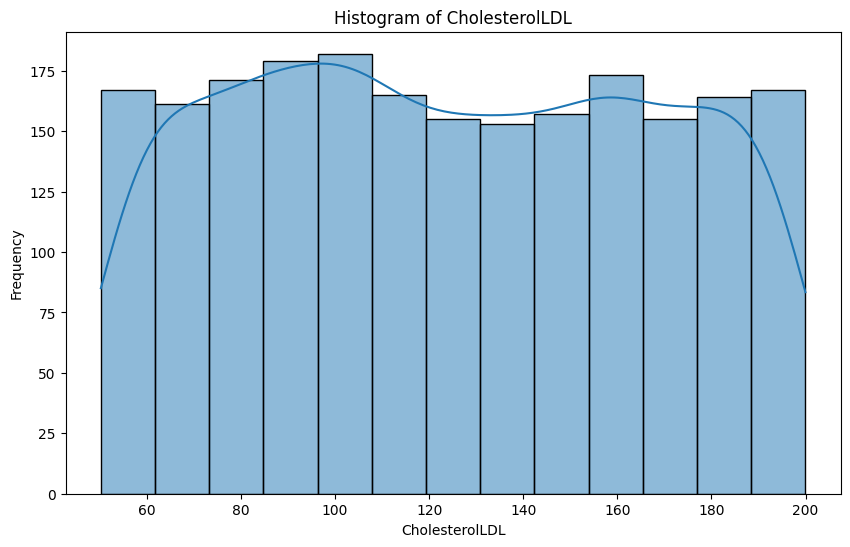

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


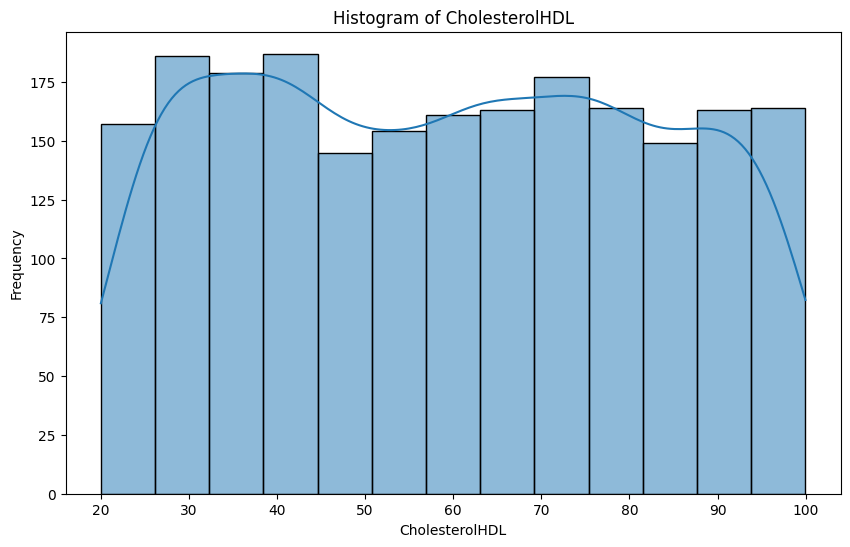

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


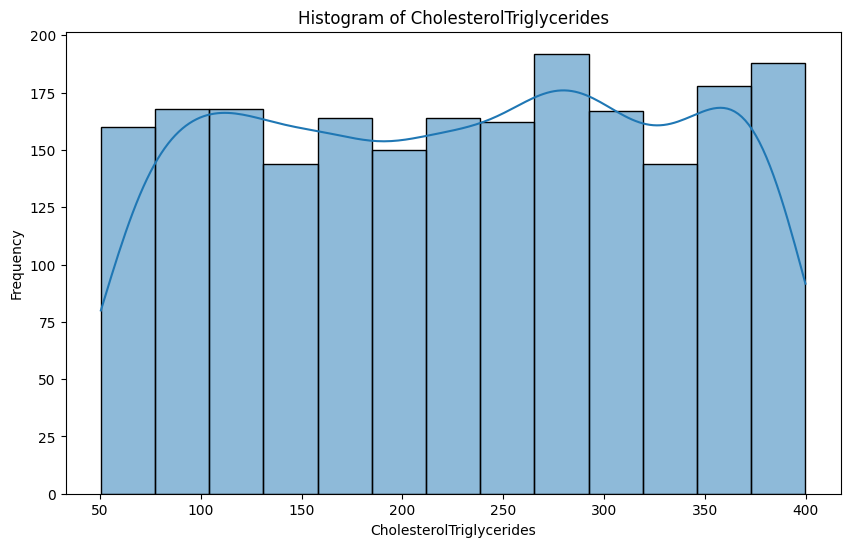

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


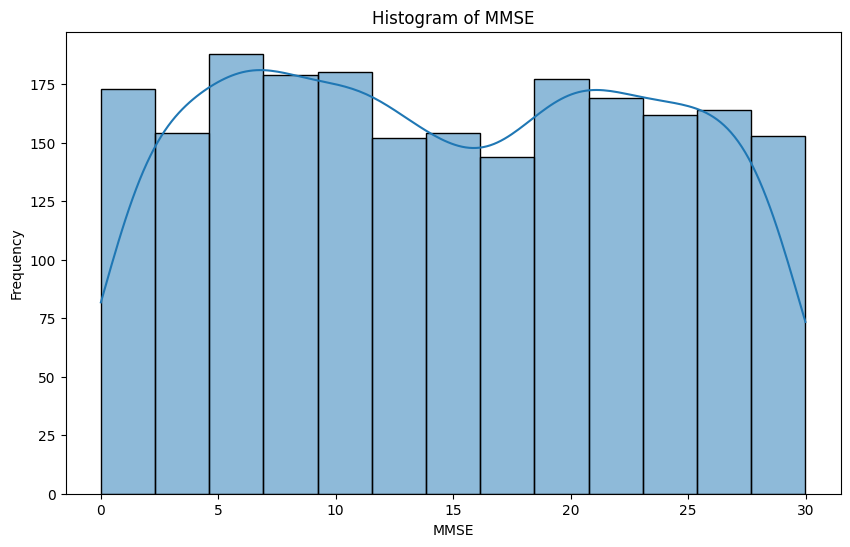

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


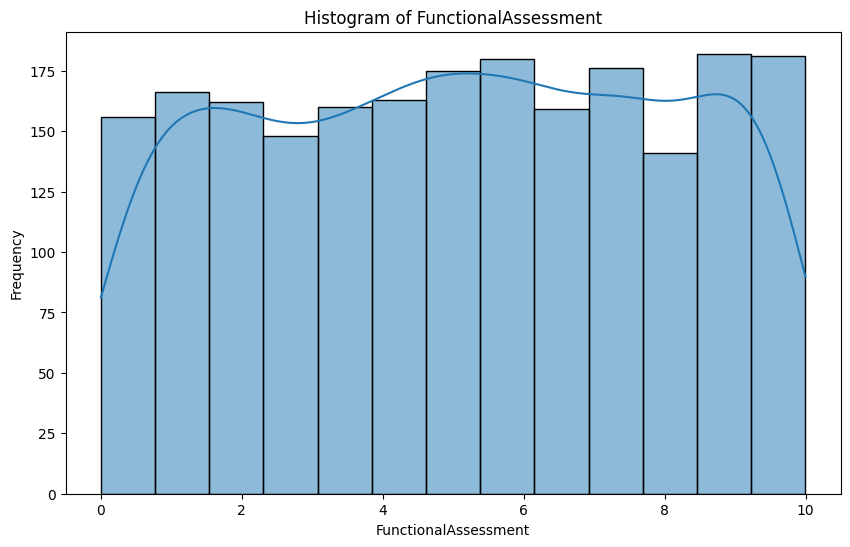

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


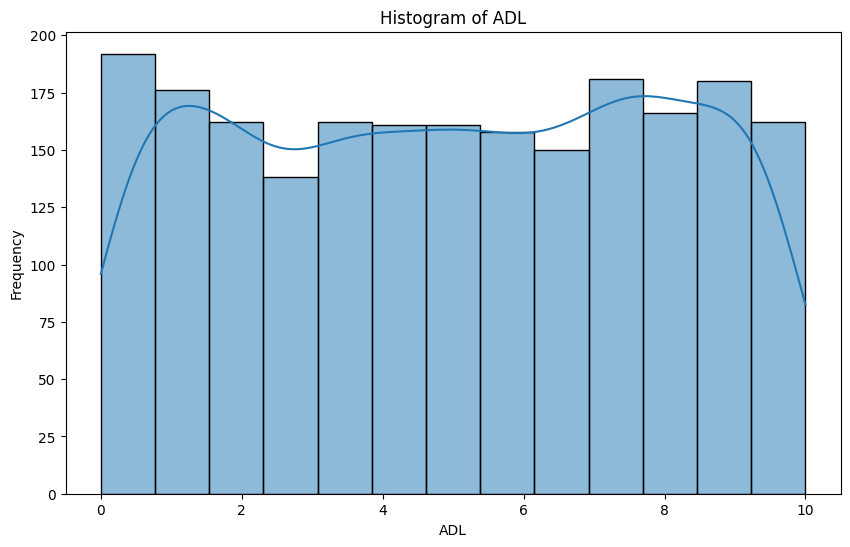

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


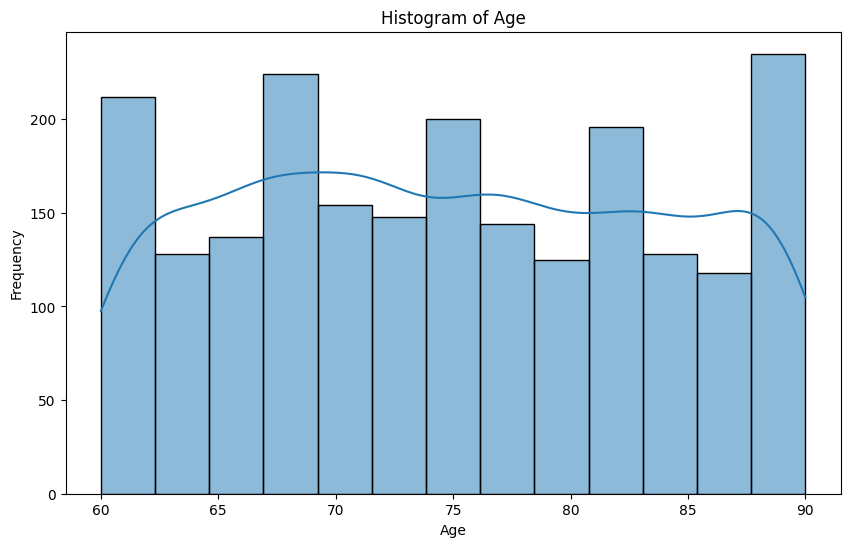

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


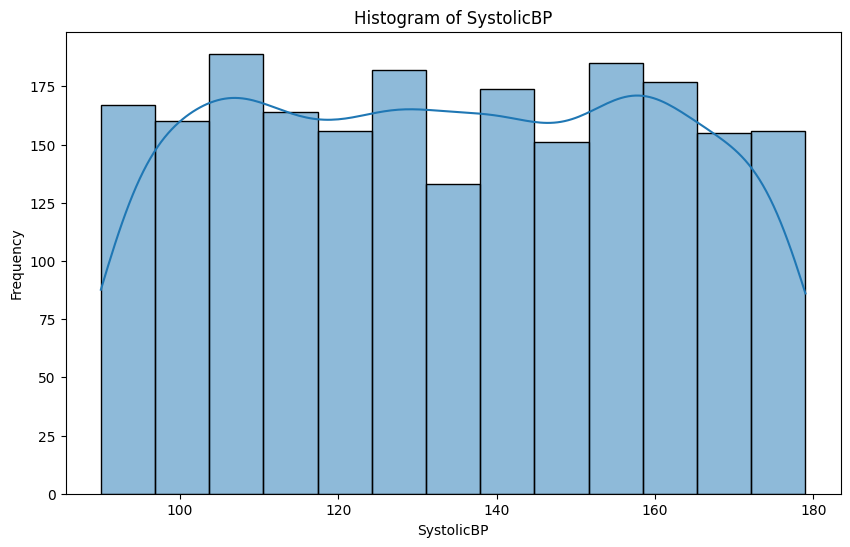

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


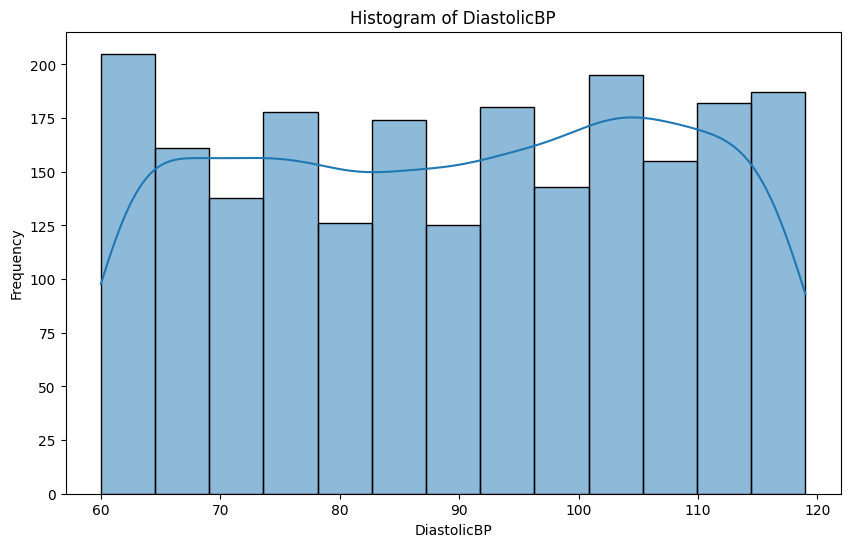

In [13]:
for col in cols2scale:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col],kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
heatcol=data.columns[[-1] + list(range(23, 27))]

<Axes: >

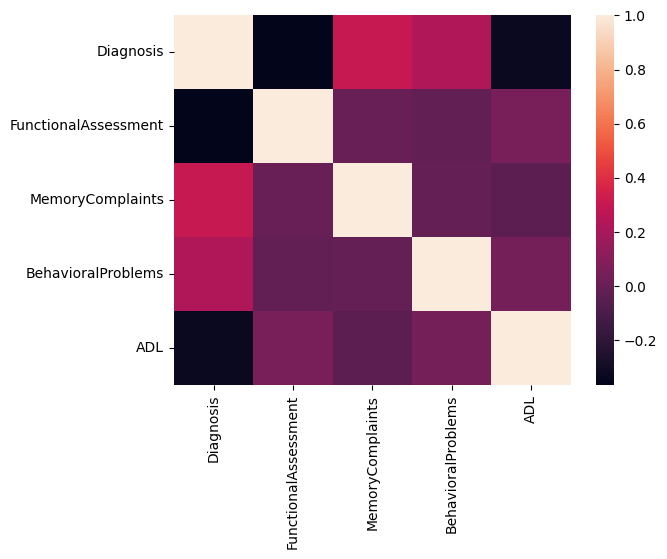

In [15]:
sns.heatmap(data[heatcol].corr())

In [16]:
data[heatcol].corr()

,Diagnosis,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL
Diagnosis,1.000000,-0.364898,0.306742,0.224350,-0.332346
FunctionalAssessment,-0.364898,1.000000,0.002320,-0.021941,0.053904
MemoryComplaints,0.306742,0.002320,1.000000,-0.009765,-0.037511
BehavioralProblems,0.224350,-0.021941,-0.009765,1.000000,0.043376
ADL,-0.332346,0.053904,-0.037511,0.043376,1.000000


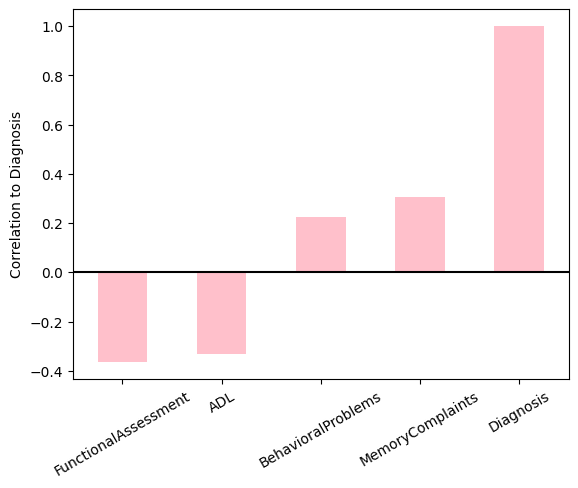

In [17]:
data[heatcol].corr().iloc[:,0].sort_values().plot(kind='bar',color='pink')
plt.axhline(0, color="k")
plt.ylabel('Correlation to Diagnosis')
plt.xticks( rotation=30)
plt.show()

**Scale data**

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [19]:
data[cols2scale]=scaler.fit_transform(data[cols2scale])

In [20]:
data=pd.get_dummies(data, columns=['Ethnicity','EducationLevel'], prefix=['Ethnicity','EducationLevel'])

In [21]:
bo=data.columns[data.dtypes==bool].tolist()
data[bo]=data[bo].astype('Int64')

## Binary Classification models

**Prepare data for training**

In [22]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [23]:
X=data.drop('Diagnosis',axis=1)
X

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,DifficultyCompletingTasks,Forgetfulness,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
0,0.433333,0,0.316960,0,0.665183,0.633375,0.133931,0.837564,0,0,...,1,0,1,0,0,0,0,0,1,0
1,0.966667,0,0.473058,0,0.227170,0.762862,0.050995,0.525021,0,0,...,0,1,1,0,0,0,1,0,0,0
2,0.433333,0,0.111553,0,0.978276,0.785408,0.181896,0.945597,1,0,...,1,0,0,0,0,1,0,1,0,0
3,0.466667,1,0.752163,1,0.610751,0.843804,0.743443,0.731994,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.966667,0,0.228472,0,0.923204,0.631707,0.078698,0.265892,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0.033333,0,0.965137,0,0.078006,0.405291,0.655316,0.589092,0,0,...,0,0,1,0,0,0,0,1,0,0
2145,0.500000,0,0.114035,0,0.938860,0.135925,0.289848,0.759124,0,0,...,0,0,1,0,0,0,0,0,1,0
2146,0.566667,0,0.018717,0,0.229779,0.989841,0.811960,0.294609,0,0,...,0,0,1,0,0,0,0,1,0,0
2147,0.600000,1,0.011650,0,0.433901,0.636096,0.125543,0.720376,0,1,...,0,1,0,0,0,1,0,1,0,0


In [24]:
y=data['Diagnosis']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Create a classification report for the model**

In [26]:
from sklearn.metrics import classification_report

**Initialize, train, predict, evluate**

## Support Vector Machine

In [27]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train, y_train)
pred_svc= svc.predict(X_test)

In [28]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       401
           1       0.80      0.69      0.74       244

    accuracy                           0.82       645
   macro avg       0.81      0.79      0.80       645
weighted avg       0.81      0.82      0.81       645



## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log = LogisticRegression()
log.fit(X_train,y_train)
pred_log = log.predict(X_test)

In [31]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       401
           1       0.79      0.68      0.73       244

    accuracy                           0.81       645
   macro avg       0.81      0.79      0.79       645
weighted avg       0.81      0.81      0.81       645



## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
pred_rfc= rfc.predict(X_test)

In [33]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       401
           1       0.95      0.78      0.85       244

    accuracy                           0.90       645
   macro avg       0.91      0.88      0.89       645
weighted avg       0.90      0.90      0.90       645



## Naive Bayes Classifier

In [34]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)
pred_nbc = nbc.predict(X_test)

In [35]:
print(classification_report(y_test,pred_nbc))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       401
           1       0.77      0.71      0.74       244

    accuracy                           0.81       645
   macro avg       0.80      0.79      0.80       645
weighted avg       0.81      0.81      0.81       645



## GBoost Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
pred_gbc= gbc.predict(X_test)

In [37]:
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       401
           1       0.94      0.89      0.91       244

    accuracy                           0.94       645
   macro avg       0.94      0.93      0.93       645
weighted avg       0.94      0.94      0.94       645



**Select the best features (top 20)**

In [38]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gbc.feature_importances_
})

top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)
top_features

,Feature,Importance
21,FunctionalAssessment,0.271669
24,ADL,0.239395
20,MMSE,0.238516
22,MemoryComplaints,0.123673
23,BehavioralProblems,0.073987
16,CholesterolTotal,0.011349
17,CholesterolLDL,0.005697
19,CholesterolTriglycerides,0.005652
0,Age,0.005396
15,DiastolicBP,0.005126


In [39]:
X_train_best=X_train[top_features['Feature']]
X_test_best=X_test[top_features['Feature']]

## XGBoost Classifier

In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_best,y_train)
pred_xgb = xgb.predict(X_test_best)

In [41]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       401
           1       0.95      0.86      0.90       244

    accuracy                           0.93       645
   macro avg       0.93      0.92      0.92       645
weighted avg       0.93      0.93      0.93       645



**Use Randomized Search**

In [42]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

In [43]:
xgb = XGBClassifier(random_state=42)
xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid,n_iter=50, scoring='accuracy', cv=5, verbose=1,random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train_best, y_train)
print(xgb_random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0.5, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.9}


In [44]:
pred_xgb = xgb_random_search.best_estimator_.predict(X_test_best)

In [45]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       401
           1       0.95      0.90      0.92       244

    accuracy                           0.94       645
   macro avg       0.94      0.93      0.94       645
weighted avg       0.94      0.94      0.94       645



## Neural Networks

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

2024-06-27 10:35:53.524950: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 10:35:53.525101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 10:35:53.726701: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [47]:
nnc=Sequential()
nnc.add(Input(shape=(X_train.shape[1],)))
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.6))
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.6))
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.6))
nnc.add(Dense(32,'relu'))
nnc.add(Dropout(0.6))
nnc.add(Dense(1,'sigmoid'))

In [48]:
nnc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=nnc.fit(X_train,y_train,epochs=250,batch_size=32,validation_data=(X_test,y_test),callbacks=[early])
pred_nnc=(nnc.predict(X_test) > 0.5).astype("int32")

Epoch 1/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4047 - loss: 1.0020 - val_accuracy: 0.6217 - val_loss: 0.6699
Epoch 2/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5648 - loss: 0.6865 - val_accuracy: 0.6217 - val_loss: 0.6659
Epoch 3/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5669 - loss: 0.6888 - val_accuracy: 0.6217 - val_loss: 0.6631
Epoch 4/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6248 - loss: 0.6630 - val_accuracy: 0.6217 - val_loss: 0.6614
Epoch 5/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.6573 - val_accuracy: 0.6217 - val_loss: 0.6574
Epoch 6/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6476 - loss: 0.6554 - val_accuracy: 0.6217 - val_loss: 0.6558
Epoch 7/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6616 - loss: 0.6290 - val_accuracy: 0.6217 - val_loss: 0.6526
Epoch 8/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6443 - loss: 0.6507 - val_accuracy: 0.6217 - v

In [49]:
print(classification_report(y_test,pred_nnc))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       401
           1       0.77      0.69      0.73       244

    accuracy                           0.81       645
   macro avg       0.80      0.78      0.79       645
weighted avg       0.80      0.81      0.80       645



In [50]:
nnc=Sequential()
nnc.add(Input(shape=(X_train_best.shape[1],)))
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.6))
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.6))
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.6))
nnc.add(Dense(32,'relu'))
nnc.add(Dropout(0.6))
nnc.add(Dense(1,'sigmoid'))

In [51]:
nnc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history_best=nnc.fit(X_train_best,y_train,epochs=250,batch_size=32,validation_data=(X_test_best,y_test),callbacks=[early])
pred_nnc=(nnc.predict(X_test_best) > 0.5).astype("int32")

Epoch 1/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5537 - loss: 0.7029 - val_accuracy: 0.6217 - val_loss: 0.6543
Epoch 2/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - loss: 0.6307 - val_accuracy: 0.6217 - val_loss: 0.6340
Epoch 3/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6375 - loss: 0.6484 - val_accuracy: 0.6217 - val_loss: 0.6222
Epoch 4/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6439 - loss: 0.6410 - val_accuracy: 0.6217 - val_loss: 0.6067
Epoch 5/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6530 - loss: 0.6147 - val_accuracy: 0.6248 - val_loss: 0.5885
Epoch 6/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.5827 - val_accuracy: 0.6481 - val_loss: 0.5624
Epoch 7/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6881 - loss: 0.5734 - val_accuracy: 0.7519 - val_loss: 0.5461
Epoch 8/250
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6955 - loss: 0.5473 - val_accuracy: 0.7829 - v

In [52]:
print(classification_report(y_test,pred_nnc))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       401
           1       0.83      0.76      0.80       244

    accuracy                           0.85       645
   macro avg       0.85      0.84      0.84       645
weighted avg       0.85      0.85      0.85       645



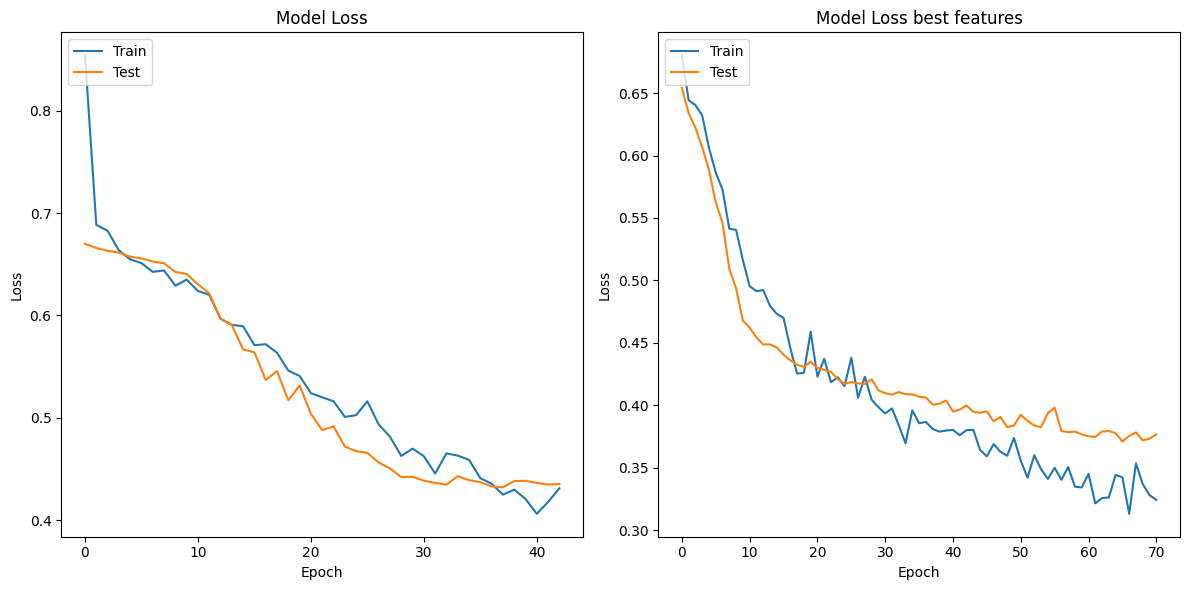

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show
plt.subplot(1, 2, 2)
plt.plot(history_best.history['loss'])
plt.plot(history_best.history['val_loss'])
plt.title('Model Loss best features')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

To conclude, the best model is XGBoost when it fits itself to the top 10 features and then it didn't improve much with the best parameters obtained by the randomized search CV, reached up to **94% accuracy**.

I enjoyed this dataset very much. if you read this and enjoy somehow too, upvoting is super duper appreciated❤️❤️❤️